# Лабораторная работа 
## Хвойнов Олег 
## Вариант 43 файл 7

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier




In [2]:
DataSet=pd.read_csv('wine.data.csv')

In [3]:
DataSet.iloc[0]

Klass                               1.00
 Alcohol                           14.23
 Malic acid                         1.71
 Ash                                2.43
 Alcalinity of ash                 15.60
 Magnesium                        127.00
 Total phenols                      2.80
 Flavanoids                         3.06
 Nonflavanoid phenols               0.28
 Proanthocyanins                    2.29
 Color intensity                    5.64
 Hue                                1.04
 OD280/OD315 of diluted wines       3.92
 Proline                         1065.00
Name: 0, dtype: float64

In [4]:
DataSet.head()

,Klass,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


##  1. Изучим набор данных
- Алкоголь Alcohol
- Яблочная кислота Malic acid
- Зола Ash
- Щелочность золы Alcalinity of ash
- Магний Magnesium
- Общие фенолы Total phenols
- Флаваноиды Flavanoids
- Нефлаваноидные фенолы Nonflavanoid phenols	
- Проантоцианы Proanthocyanins
- Интенсивность цвета Color intensity
- Оттенок Hue
- OD280/OD315 разбавленных вин OD280/OD315 of diluted wines
- Пролин Proline

##  2.Удалим дубликаты строк в наборе данных

In [5]:
print(DataSet.shape)

(178, 14)


In [6]:
DataSet=DataSet.drop_duplicates()
print(DataSet.shape)

(178, 14)


## 3. Оценим сбалансированность данных по классам 

<AxesSubplot:xlabel='Klass'>

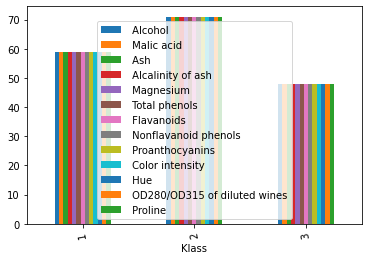

In [7]:
DataSet.groupby('Klass').count().plot(kind='bar',rot=100)

#### Поскольку сбалансированность данных по калссам высокая используем ROC метрику

## 4.	Выполним масштабирование количественных признаков

<AxesSubplot:>

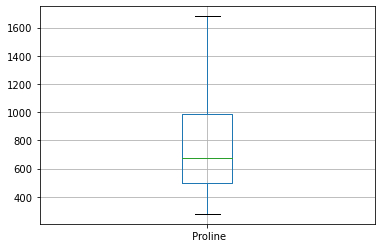

In [8]:
DataSet.boxplot(column=[' Proline'])

<AxesSubplot:>

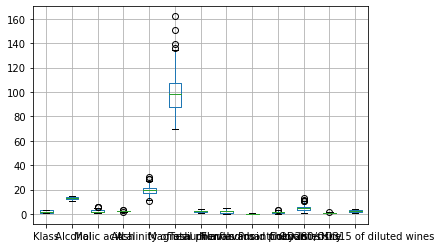

In [9]:
DataSet1=DataSet.drop([' Proline'], axis='columns')
DataSet1.boxplot()

In [10]:
DataSet_n=preprocessing.normalize(DataSet)

In [11]:
DataSet_n=pd.DataFrame(DataSet_n)
DataSet_n.columns=['Klass','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']


<AxesSubplot:>

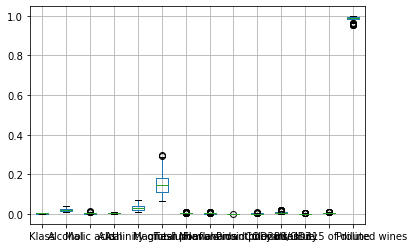

In [12]:
DataSet_n.boxplot()

<AxesSubplot:>

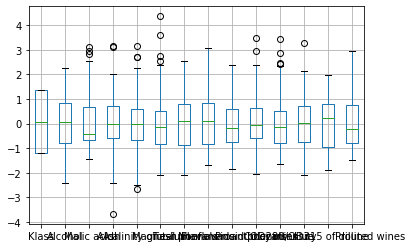

In [13]:
DataSet_s=preprocessing.scale(DataSet)
DataSet_s=pd.DataFrame(DataSet_s)
DataSet_s.columns=['Klass','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
DataSet_s.boxplot()

## 5.	Выполним замену категориальных признаков

## 6.	Оценитим корреляцию между признаками и удалитим те признаки, которые коррелируют с наибольшим числом других (для лин )

In [14]:
l=['Klass','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
P=DataSet_n[l].corr()
P

,Klass,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Klass,1.000000,0.875228,0.678845,0.848681,0.864579,0.824064,0.502431,0.183544,0.770432,0.433052,0.611852,0.542946,0.470946,-0.772245
Alcohol,0.875228,1.000000,0.622928,0.937653,0.931706,0.923763,0.768087,0.546075,0.763887,0.658288,0.391967,0.787109,0.781888,-0.909308
Malic acid,0.678845,0.622928,1.000000,0.624181,0.625013,0.560272,0.345252,0.129147,0.569596,0.349386,0.406474,0.248712,0.346406,-0.524663
Ash,0.848681,0.937653,0.624181,1.000000,0.966468,0.915831,0.747195,0.552450,0.780876,0.638723,0.381680,0.746696,0.754064,-0.902545
Alcalinity of ash,0.864579,0.931706,0.625013,0.966468,1.000000,0.893946,0.721423,0.523267,0.784569,0.642498,0.370805,0.725635,0.745222,-0.880512
Magnesium,0.824064,0.923763,0.560272,0.915831,0.893946,1.000000,0.735255,0.542247,0.681605,0.651123,0.352734,0.758158,0.735386,-0.979435
Total phenols,0.502431,0.768087,0.345252,0.747195,0.721423,0.735255,1.000000,0.866761,0.449448,0.803860,0.085810,0.782214,0.882160,-0.761251
Flavanoids,0.183544,0.546075,0.129147,0.552450,0.523267,0.542247,0.866761,1.000000,0.219780,0.774064,-0.132989,0.681173,0.840877,-0.599046
Nonflavanoid phenols,0.770432,0.763887,0.569596,0.780876,0.784569,0.681605,0.449448,0.219780,1.000000,0.399438,0.377522,0.565921,0.491633,-0.648992
Proanthocyanins,0.433052,0.658288,0.349386,0.638723,0.642498,0.651123,0.803860,0.774064,0.399438,1.000000,0.074612,0.655400,0.782869,-0.668089


<AxesSubplot:>

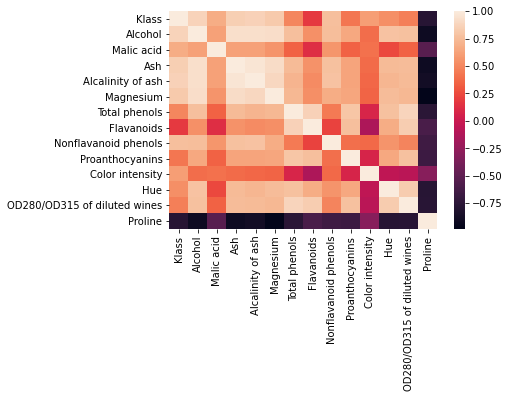

In [15]:
sns.heatmap(P)

In [16]:
R=['Klass','Malic acid','Ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
DataSet_n[R].corr()

,Klass,Malic acid,Ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Klass,1.000000,0.678845,0.848681,0.824064,0.502431,0.183544,0.770432,0.433052,0.611852,0.542946,0.470946,-0.772245
Malic acid,0.678845,1.000000,0.624181,0.560272,0.345252,0.129147,0.569596,0.349386,0.406474,0.248712,0.346406,-0.524663
Ash,0.848681,0.624181,1.000000,0.915831,0.747195,0.552450,0.780876,0.638723,0.381680,0.746696,0.754064,-0.902545
Magnesium,0.824064,0.560272,0.915831,1.000000,0.735255,0.542247,0.681605,0.651123,0.352734,0.758158,0.735386,-0.979435
Total phenols,0.502431,0.345252,0.747195,0.735255,1.000000,0.866761,0.449448,0.803860,0.085810,0.782214,0.882160,-0.761251
Flavanoids,0.183544,0.129147,0.552450,0.542247,0.866761,1.000000,0.219780,0.774064,-0.132989,0.681173,0.840877,-0.599046
Nonflavanoid phenols,0.770432,0.569596,0.780876,0.681605,0.449448,0.219780,1.000000,0.399438,0.377522,0.565921,0.491633,-0.648992
Proanthocyanins,0.433052,0.349386,0.638723,0.651123,0.803860,0.774064,0.399438,1.000000,0.074612,0.655400,0.782869,-0.668089
Color intensity,0.611852,0.406474,0.381680,0.352734,0.085810,-0.132989,0.377522,0.074612,1.000000,-0.049345,-0.072378,-0.304478
Hue,0.542946,0.248712,0.746696,0.758158,0.782214,0.681173,0.565921,0.655400,-0.049345,1.000000,0.832888,-0.773559


## 7.	Заполнитим пропущенные значения в данных

In [17]:
DataSet_n.count().isna()

Klass                           False
Alcohol                         False
Malic acid                      False
Ash                             False
Alcalinity of ash               False
Magnesium                       False
Total phenols                   False
Flavanoids                      False
Nonflavanoid phenols            False
Proanthocyanins                 False
Color intensity                 False
Hue                             False
OD280/OD315 of diluted wines    False
Proline                         False
dtype: bool

## 8.	Решим поставленную задачу классификации с помщью линейного классификатора и логического классификатора.
### Линейный классификатор

In [18]:
X1=DataSet_s.values[:,1:13]
Y1=DataSet.values[:,0]
X1_train, X1_test, Y1_train, Y1_test=train_test_split(X1, Y1, test_size=.2, random_state=1)
#DataSet_n.describe()

# Персептрон
ppn = Perceptron(max_iter = 500, eta0 = 1, penalty='l2', random_state = 1)
ppn.fit(X1_train, Y1_train)
y1_pred = ppn.predict(X1_test)
print("Оценка точности: "+ str(accuracy_score(Y1_test, y1_pred)))

print("\nМатрица ошибок: \n"+str(confusion_matrix(Y1_test,y1_pred)))

print("\nОтчет о классификации: \n"+str(classification_report(Y1_test, y1_pred)))


Оценка точности: 1.0

Матрица ошибок: 
[[14  0  0]
 [ 0 13  0]
 [ 0  0  9]]

Отчет о классификации: 
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00        13
         3.0       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### Логический классификатор

In [19]:
ppt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3,max_features= 10, random_state = 1)
ppt.fit(X1_train, Y1_train)
y2_pred = ppn.predict(X1_test)
print("Оценка точности: " + str(accuracy_score(Y1_test, y2_pred)))
print("\nМатрица ошибок: \n" + str(confusion_matrix(Y1_test, y2_pred)))
print("\nОтчет о классификации: \n" + str(classification_report(Y1_test, y2_pred)))

Оценка точности: 1.0

Матрица ошибок: 
[[14  0  0]
 [ 0 13  0]
 [ 0  0  9]]

Отчет о классификации: 
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00        13
         3.0       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### Воспользуемся методом Gridsearchcv

#### Для линейного классификатора

In [20]:
ppn_params = {'max_iter': range(500,2000,50), 'penalty':('l2','l1','elasticnet')}
ppn_grid = GridSearchCV(ppn, ppn_params, cv=5, n_jobs=-1, verbose=True)
ppn_grid.fit(X1_train, Y1_train)

print(ppn_grid.best_params_)

print(ppn_grid.best_score_)

print(accuracy_score(Y1_test, y1_pred))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
{'max_iter': 500, 'penalty': 'l1'}
0.9571428571428571
1.0


#### Для логического классификатора

In [21]:
tree_params = {'max_depth': range(1,11), 'max_features': range(4,19), 'criterion':('gini', 'entropy')}
tree_grid = GridSearchCV(ppt, tree_params, cv=5, n_jobs=-1, verbose=True)
tree_grid.fit(X1_train, Y1_train)

print(tree_grid.best_params_)

print(tree_grid.best_score_)

print(accuracy_score(Y1_test, y2_pred))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 8}
0.9790640394088671
1.0


C:\GitHub\WPy64-3910\python-3.9.1.amd64\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.60492611 0.61921182 0.61921182 0.61921182 0.61921182 0.61921182
 0.61921182 0.61921182 0.591133          nan        nan        nan
        nan        nan        nan 0.88694581 0.77339901 0.83004926
 0.89408867 0.89384236 0.90098522 0.89408867 0.89408867 0.85862069
        nan        nan        nan        nan        nan        nan
 0.90123153 0.80837438 0.88669951 0.91502463 0.92241379 0.93669951
 0.92980296 0.92980296 0.9364532         nan        nan        nan
        nan        nan        nan 0.9226601  0.89310345 0.89359606
 0.93669951 0.95049261 0.94359606 0.9364532  0.92955665 0.9364532
        nan        nan        nan        nan        nan        nan
 0.94359606 0.88596059 0.90073892 0.95098522 0.96453202 0.95763547
 0.95073892 0.94384236 0.95073892        nan        nan        nan
        nan        nan        nan 0.943

### Перекресный метод

#### Для линейной классификации 

In [22]:
all_accuracies = cross_val_score(estimator=ppn, X=X1_train, y=Y1_train, cv=5)
print("Точность для cv=5: ",all_accuracies)
print("Среднее значение точности: ",all_accuracies.mean())

Точность для cv=5:  [0.96551724 0.96551724 0.89285714 0.96428571 0.92857143]
Среднее значение точности:  0.9433497536945813


#### Для логической классификации

In [23]:
all_accuracies = cross_val_score(estimator=ppt, X=X1_train, y=Y1_train, cv=5)
print("Точность для cv=5: ",all_accuracies)
print("Среднее значение точности: ",all_accuracies.mean())

Точность для cv=5:  [0.89655172 0.93103448 0.92857143 0.96428571 0.92857143]
Среднее значение точности:  0.9298029556650247


## 9.	Сравните кривые для классификаторов

### ROC для линейного 

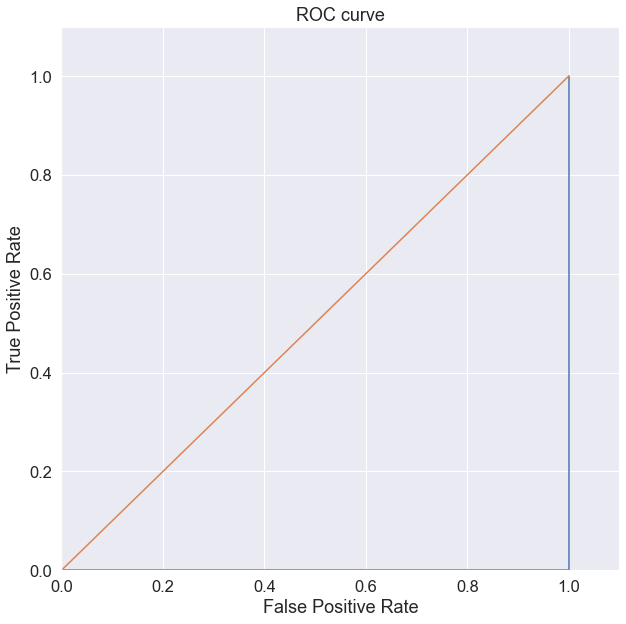

In [24]:
from sklearn.metrics import precision_recall_curve, classification_report
from matplotlib.pylab import rc, plot
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 10))
fpr, tpr, thresholds = metrics.roc_curve(Y1_test, y1_pred, pos_label=1)
plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

### ROC для логического

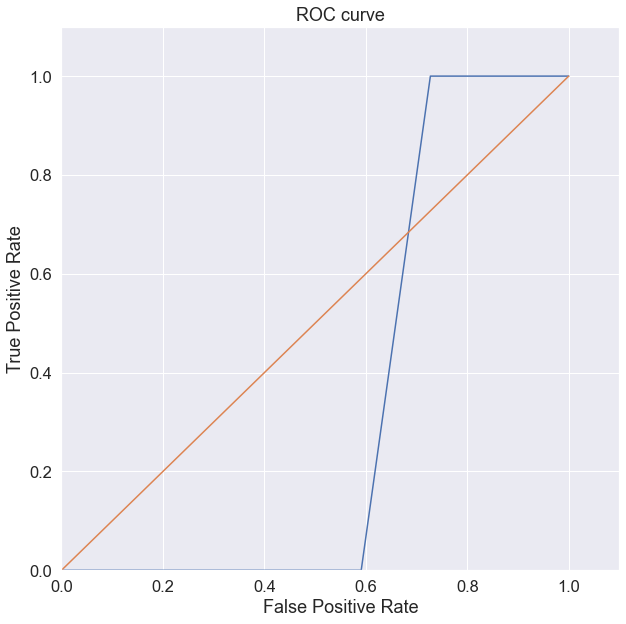

In [25]:
plt.figure(figsize=(10, 10))
fpr, tpr, thresholds = metrics.roc_curve(Y1_test, ppt.predict_proba(X1_test)[:,1], pos_label=1)
plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

### PR для линейного

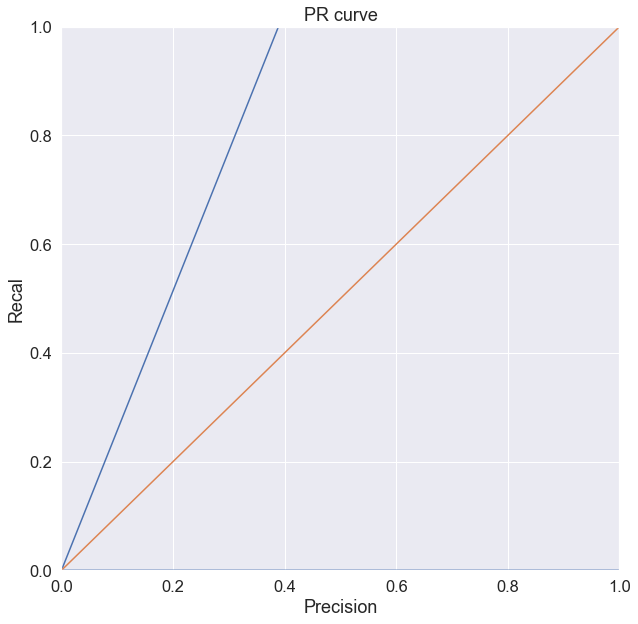

In [26]:
plt.figure(figsize=(10, 10))
fpr, tpr, thresholds = metrics.precision_recall_curve(Y1_test, y1_pred, pos_label=1)
plt.plot(fpr, tpr, label='PR curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Precision')
plt.ylabel('Recal')
plt.title('PR curve')
plt.show()

### PR для логического

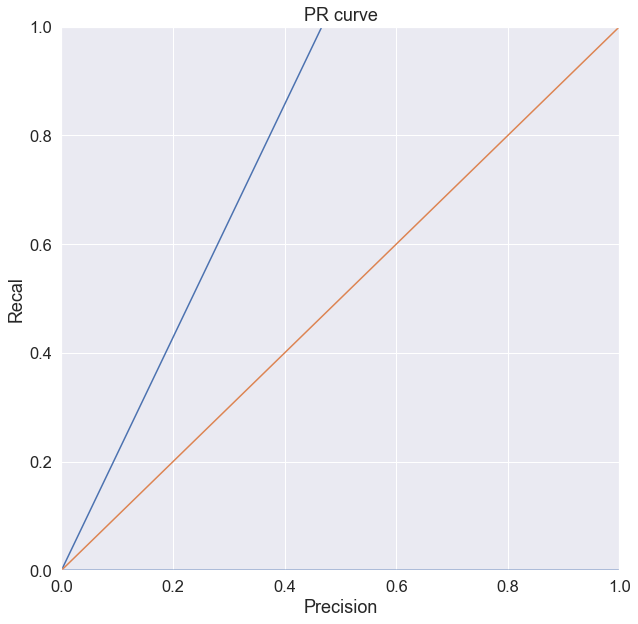

In [27]:
plt.figure(figsize=(10, 10))
fpr, tpr, thresholds = metrics.precision_recall_curve(Y1_test, ppt.predict_proba(X1_test)[:,1], pos_label=1)
plt.plot(fpr, tpr, label='PR curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Precision')
plt.ylabel('Recal')
plt.title('PR curve')
plt.show()